# This notebook is used to perform Slice by slice segmentation of mouse preplantation Embryo cells
The models enetered in this notebook are the 2D UNET model and 2D Stardist model
The input is the directory of 3D images, the UNET model which is trained on a 
set of 2D images is applied to each slice. Same for the stardist model. These predictions are used to make the smartseed predictions and the slices are stitched together to make fake 3D segmentations based on the user input parameters.

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
%tensorflow_version 1.x

Mounted at /content/drive
TensorFlow 1.x selected.


In [2]:
!pip install tiffile
!pip install elasticdeform
!pip install keras==2.2.5
!pip install csbdeep
!pip install stardist
!pip install embryoseg

  Created wheel for elasticdeform: filename=elasticdeform-0.4.7-cp37-cp37m-linux_x86_64.whl size=73905 sha256=f253e0f78e2adc7f062b32ab3bce04800c13b4c8e52d222e02fb2c5c2dabfab9
  Stored in directory: /root/.cache/pip/wheels/1d/5e/8a/890fbf14dc7f26d5da56968248eb7b85fd7e72870462e2c3e3
Successfully built elasticdeform
     |████████████████████████████████| 337kB 13.6MB/s 
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1
     |████████████████████████████████| 71kB 7.1MB/s 
     |████████████████████████████████| 378kB 18.4MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
     |████████████████████████████████| 419kB 13.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for stardist: filename=stardist-0.6.1-cp37-cp37m-linux_x86_64.whl size=1862039 sha256=de6

In [4]:
%cd '/content/drive/My Drive/BTrack/'
import glob
import os
import numpy as np
from embryoseg.utils.helpers import EmbryoSegFunction

os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"
from pathlib import Path
from stardist.models import StarDist2D
from csbdeep.models import Config, CARE

/content/drive/My Drive/BTrack


Using TensorFlow backend.


In [5]:
ImageDir = '/content/drive/My Drive/BTrack/EmbryoSeg/Images/'
Model_Dir = '/content/drive/My Drive/BTrack/EmbryoSeg/models/'
SaveDir = '/content/drive/My Drive/BTrack/EmbryoSeg/save/'


StardistModelName = 'StarEmbryo'
UNETModelName = 'UnetEmbryo'

StarModel = StarDist2D(config = None, name = StardistModelName, basedir = Model_Dir)
UnetModel = CARE(config = None, name = UNETModelName, basedir = Model_Dir)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Loading network weights from 'weights_best.h5'.
Couldn't load thresholds from 'thresholds.json', using default values. (Call 'optimize_thresholds' to change that.)
Using default values: prob_thresh=0.5, nms_thresh=0.4.
Loading network weights from 'weights_best.h5'.


In [6]:
#Number of tiles to break the image into for applying the prediction to fit in the computer memory
n_tiles = (1,1)
#Minimum size of the Mask region to be segmented
min_size_mask = 1500
#Minimum size of the individual cells inside the Mask region to be segmented
min_size = 1500
#Number of pixels to correct for proper boundary reconstruction, it is emperical and depends on quality 
#of trained model
smartcorrection = 15
#The distance between the slices in pixels that has to be stitched toger to make a fake 3D object
#Fake 3D object have the same integer label segmentation/same color in Napari browser
linkthreshold = 20


Generating SmartSeed results
Applying UNET prediction

Applying StarDist prediction


/usr/local/lib/python3.7/dist-packages/embryoseg/utils/helpers.py:258: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  Watershed = remove_small_objects(Watershed.astype('uint16'), min_size = min_size)


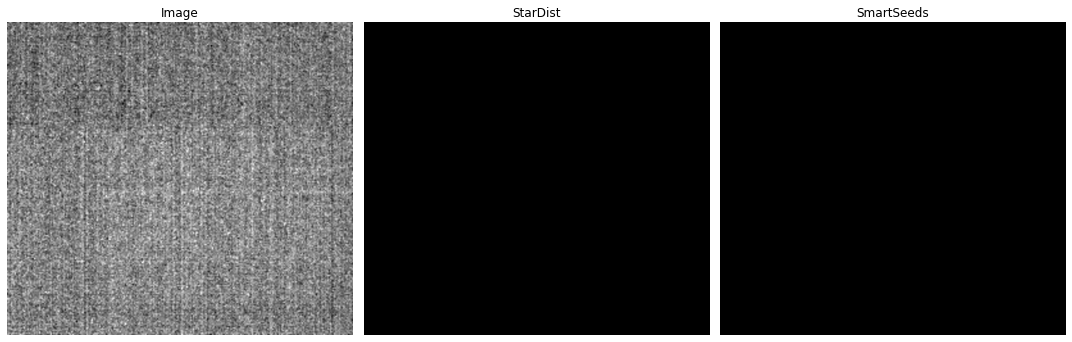

Applying UNET prediction
Applying StarDist prediction


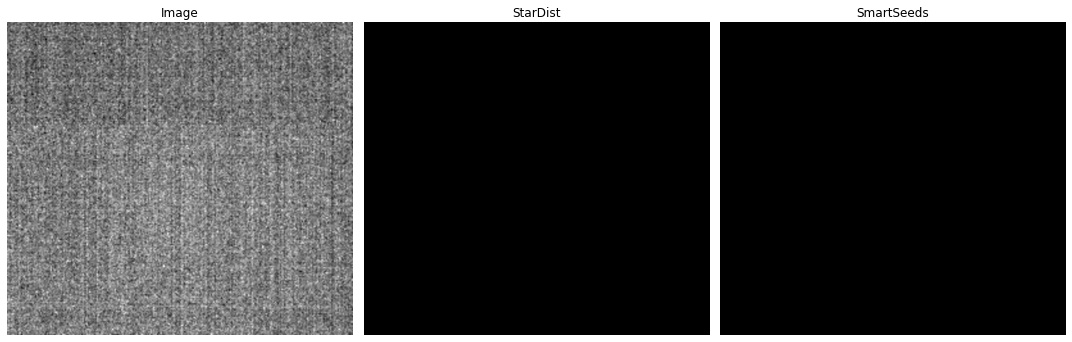

Applying UNET prediction
Applying StarDist prediction


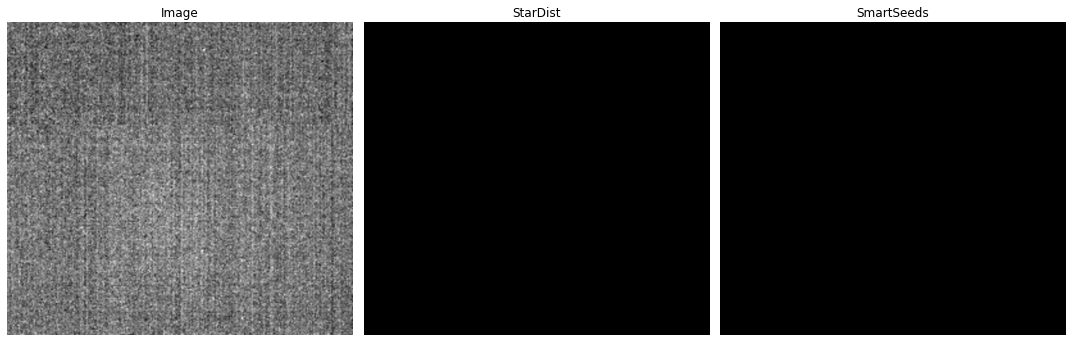

Applying UNET prediction
Applying StarDist prediction


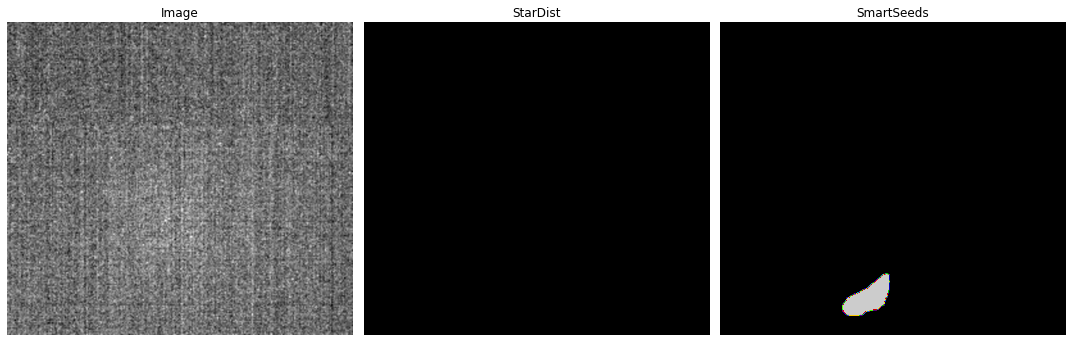

Applying UNET prediction
Applying StarDist prediction


/usr/local/lib/python3.7/dist-packages/embryoseg/utils/helpers.py:228: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  StarImage = remove_small_objects(StarImage.astype('uint16'), min_size = min_size)
100%|██████████| 75720/75720 [00:03<00:00, 21424.33it/s]


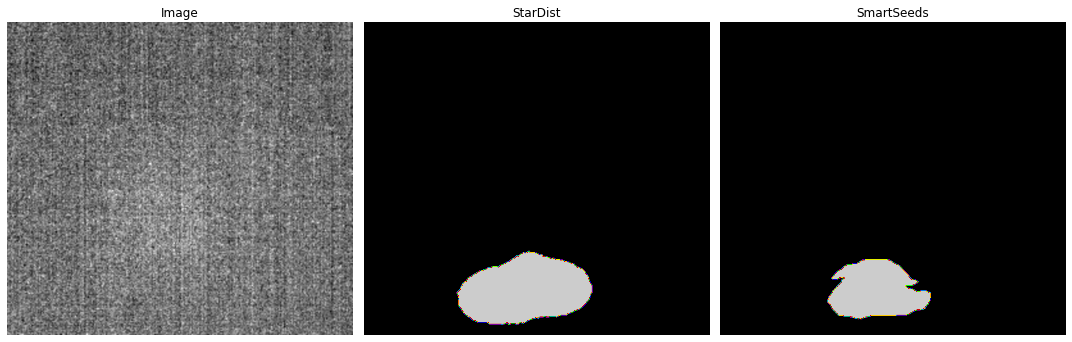

Applying UNET prediction
Applying StarDist prediction


100%|██████████| 81934/81934 [00:03<00:00, 21928.10it/s]


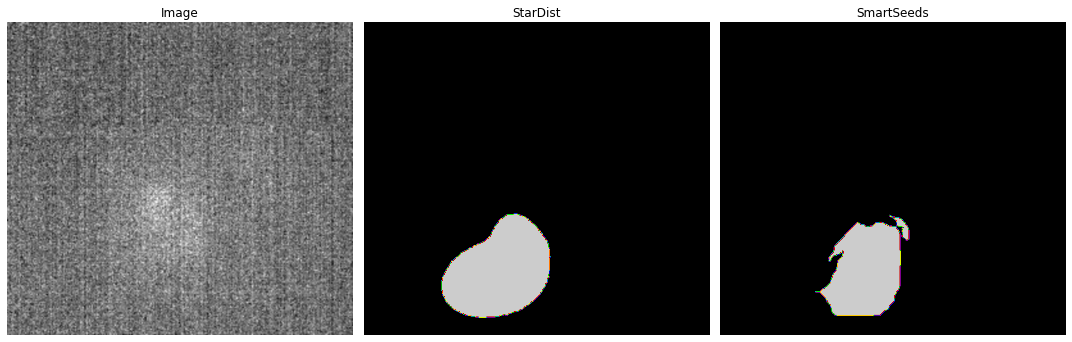

Applying UNET prediction
Applying StarDist prediction


100%|██████████| 39848/39848 [00:01<00:00, 21176.50it/s]


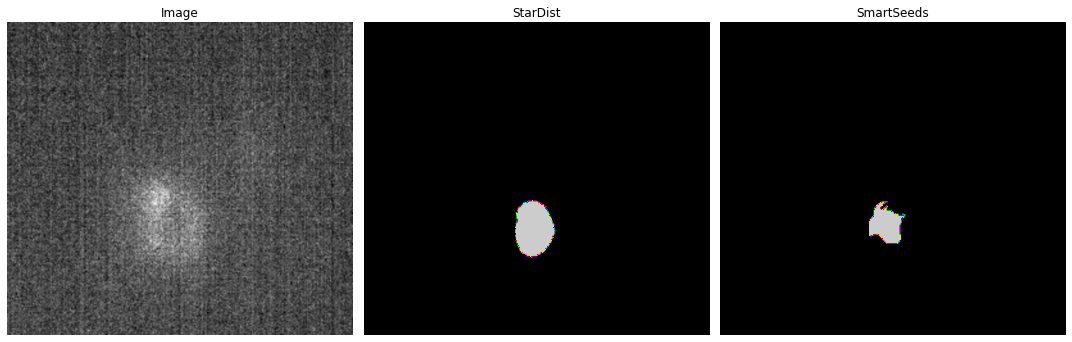

Applying UNET prediction
Applying StarDist prediction


100%|██████████| 4609/4609 [00:00<00:00, 19411.04it/s]


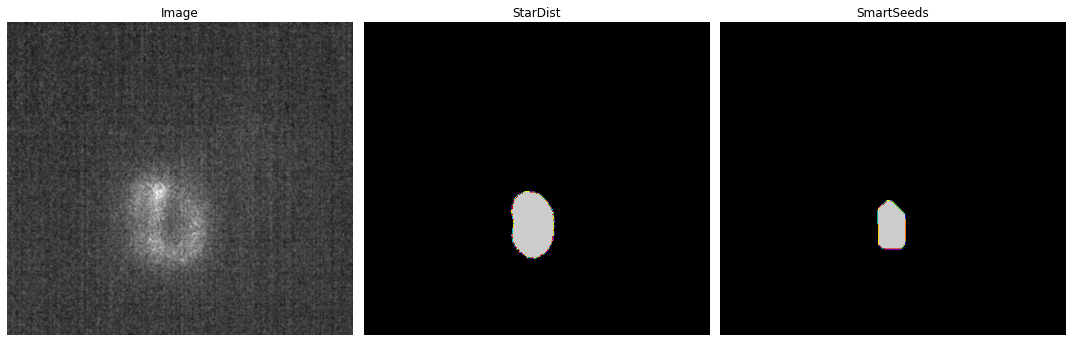

Applying UNET prediction
Applying StarDist prediction


100%|██████████| 15617/15617 [00:00<00:00, 21580.41it/s]


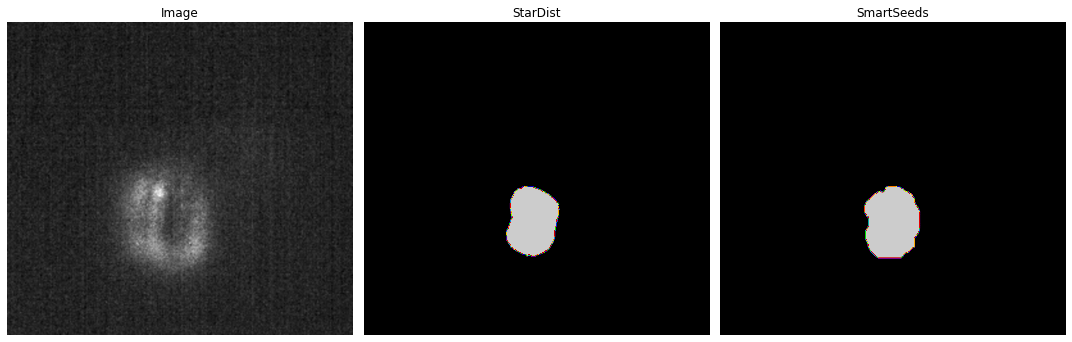

Applying UNET prediction
Applying StarDist prediction


100%|██████████| 16932/16932 [00:00<00:00, 21843.61it/s]


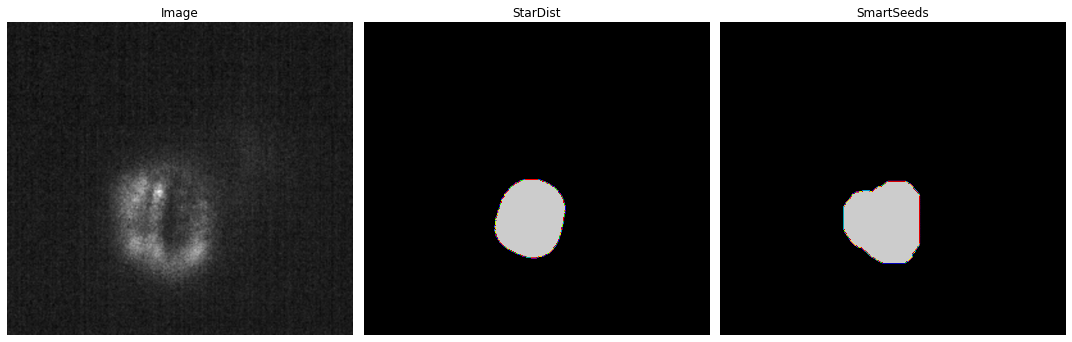

Applying UNET prediction
Applying StarDist prediction


100%|██████████| 34346/34346 [00:01<00:00, 21137.90it/s]


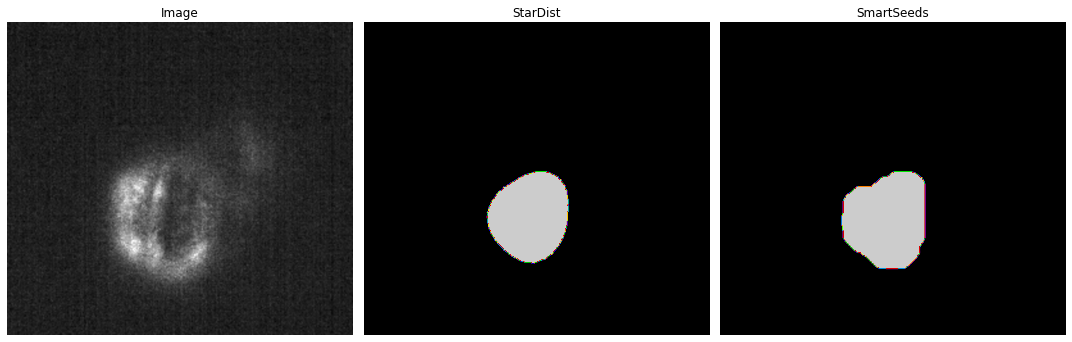

Applying UNET prediction
Applying StarDist prediction


100%|██████████| 37786/37786 [00:01<00:00, 21740.12it/s]


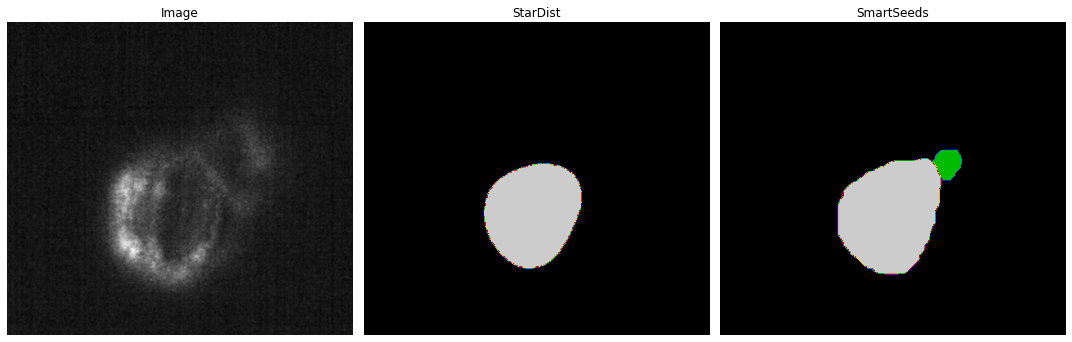

Applying UNET prediction
Applying StarDist prediction


100%|██████████| 38563/38563 [00:01<00:00, 21254.26it/s]


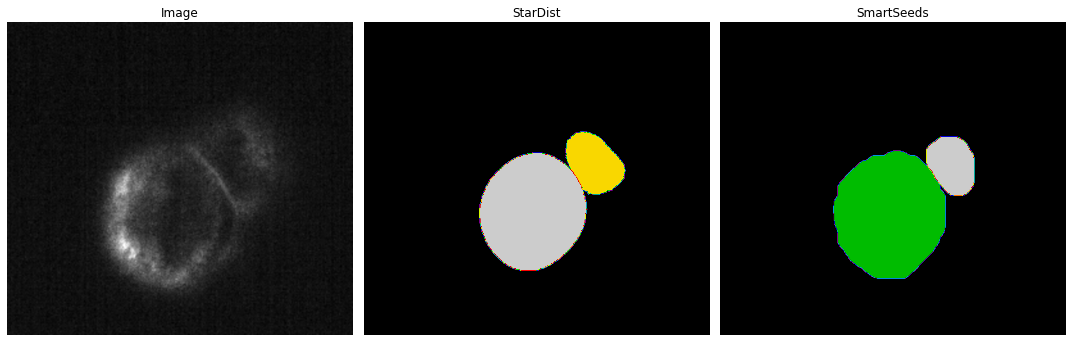

Applying UNET prediction
Applying StarDist prediction


 45%|████▍     | 12983/28917 [00:00<00:00, 21481.97it/s]

In [ ]:
Raw_path = os.path.join(ImageDir, '*tif')
filesRaw = glob.glob(Raw_path)
filesRaw.sort
for fname in filesRaw:
          
    EmbryoSegFunction(ImageDir, SaveDir, fname, UnetModel, StarModel,  min_size_mask = min_size_mask, min_size = min_size, n_tiles = n_tiles, 
                             smartcorrection = smartcorrection, threshold = linkthreshold, masklinkthreshold = linkthreshold)
